# Lab 5 - Solutions 2: Non-linearly separable data

In [1]:
import numpy as np
from scipy.stats import norm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
## Generate the data

nbpts1 = 100  # Number of points in first cluster (vary to explore effect of number of points)
mu1 = [3, 0]  # the mean of the first cluster (this is a vector as we are in 2D) -- move it around
sigma1 = [[0.7, 0], [0, 0.7]]  # the covariance matrix of the first cluster -- this one is not correlated
data1 = np.random.multivariate_normal(mu1, sigma1, nbpts1)

nbpts2 = 100  # Number of points in second cluster (vary to explore effect of number of points)
mu2 = [6, 0]  # the mean of the second cluster (this is a vector as we are in 2D) -- move it around
sigma2 = [[1.0, 0.0], [0.0, 1.0]]  # the covariance matrix of the second cluster
data2 = np.random.multivariate_normal(mu2, sigma2, nbpts2)

data = np.concatenate((data1, data2), axis=0)  # Concatenate the data by row
classes = np.concatenate([np.zeros(nbpts1, dtype=int), np.ones(nbpts2, dtype=int)])  # integers

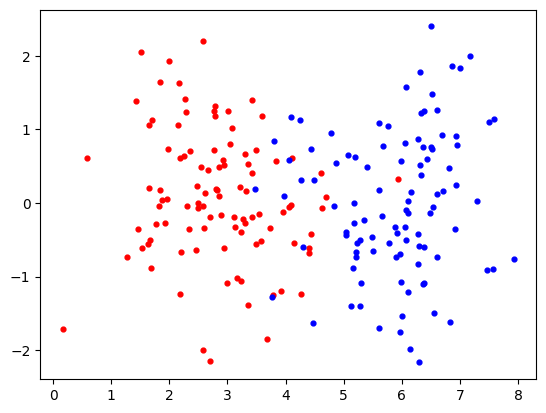

In [3]:
## 2D plot of the data to check linear separability

plt.figure(1)
plt.scatter(data1[:, 0], data1[:, 1], c='r', s=12)
plt.scatter(data2[:, 0], data2[:, 1], c='b', s=12)

## Batch learning, default settings.

In [4]:
## Set up Perceptron for batch
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, hinge_loss, confusion_matrix  # Python has a class of metrics -- very useful

In [5]:
clf = Perceptron(eta0=1, max_iter=100)  # Here I'm going to simply set a max number of epochs to 100. You can vary this number.
clf.fit(data, classes)  # Learning.

Perceptron(eta0=1, max_iter=100)

In [7]:
pred_class = clf.predict(data)  # Prediction after learning

In [8]:
# Print some statistics
print(f'Process completed in {clf.n_iter_} epochs')
print(f'Classification accuracy = {accuracy_score(classes, pred_class, normalize=False)}')
print(confusion_matrix(classes, pred_class))  # Confusion matrix

Process completed in 12 epochs
Classification accuracy = 160
[[ 60  40]
 [  0 100]]


In [9]:
# Let's plot the weights
print(f'Final weights are: {clf.coef_[0][0]:.3f} {clf.coef_[0][1]:.3f} {clf.intercept_[0]:.3f}\n')

Final weights are: 15.434 4.701 -48.000



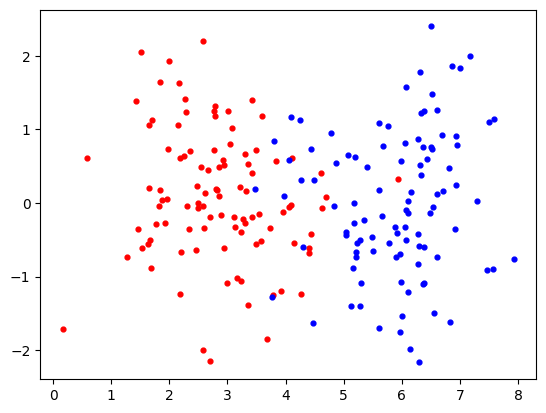

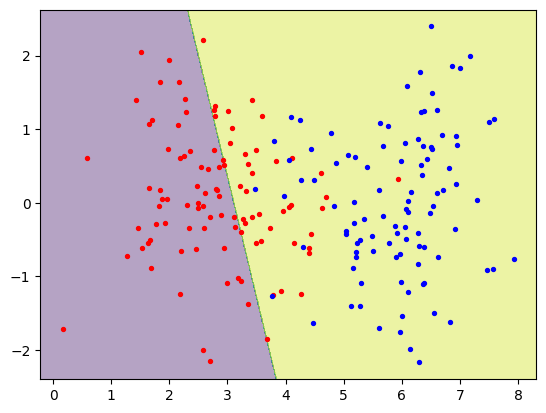

In [10]:
# Plotting decision regions

# First find out area of the graph
plt.figure(1)
plt.scatter(data1[:, 0], data1[:, 1], c='r', s=12)
plt.scatter(data2[:, 0], data2[:, 1], c='b', s=12)
axes = plt.gca()
(x_min, x_max) = axes.get_xlim()
(y_min, y_max) = axes.get_ylim()
# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)  # Will reveal decision boundary
plt.scatter(data1[:, 0], data1[:, 1], c='r', s=8)
plt.scatter(data2[:, 0], data2[:, 1], c='b', s=8)

## Sequential learning, default settings

Process terminated after 1000 iterations or 5 epochs
Classification accuracy = 176
[[77 23]
 [ 1 99]]
Final weights are: 0.107 -0.015 -0.370


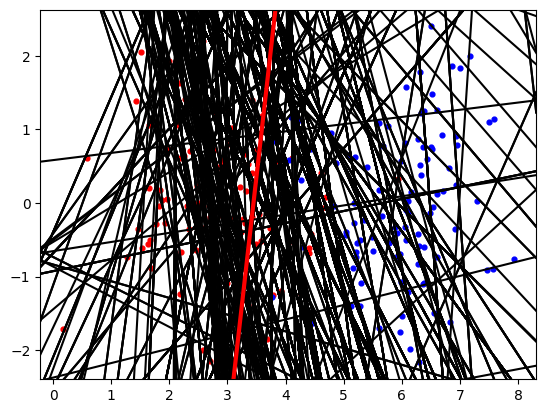

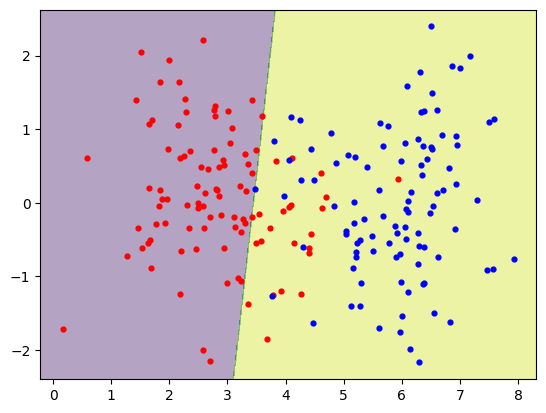

In [11]:
## Set up Perceptron for sequential
# Same code but use function partial_fit.
from sklearn.utils import shuffle  # will use this function to shuffle presentation of data before each epoch

clf = Perceptron(eta0=0.01, alpha=0.0)  # Here I'm going to specify a value for the learning rate (consider changing it to see effect) and also setting regularisation to 0.0 as we do not need it.

# Shuffle dataset
data, classes = shuffle(data, classes, random_state=0)

plt.figure(3)
plt.scatter(data1[:, 0], data1[:, 1], c='r', s=12)
plt.scatter(data2[:, 0], data2[:, 1], c='b', s=12)

num_iter = 0
max_iter = 1000  # Setting a max number of iterations
while num_iter < max_iter:

    # Shuffle at the beginning of each epoch
    if num_iter % len(data) == 0:
        data, classes = shuffle(data, classes, random_state=0)  # Shuffle dataset

    clf.partial_fit(data[num_iter % len(data), :].reshape(1, -1),
                    [classes[num_iter % len(data)]],
                    classes=np.unique(classes))  # Learning over one sample

    # Plot the new decision boundary
    axes = plt.gca()
    (x_min, x_max) = axes.get_xlim()
    (y_min, y_max) = axes.get_ylim()  # We want to keep the plot to the same dimension
    plt.plot([x_min, x_max],
             [(-clf.coef_[0][0] * x_min - clf.intercept_) / clf.coef_[0][1],
              (-clf.coef_[0][0] * x_max - clf.intercept_) / clf.coef_[0][1]],
             'k-')
    plt.ylim([y_min, y_max])  # Restrict plot to original dimension
    plt.xlim([x_min, x_max])

    pred_class = clf.predict(data) # Prediction after learning -- actually not needed for this stopping criterion
    num_iter += 1

# Highlight last boundary
# Plot the new decision boundary
axes = plt.gca()
(x_min, x_max) = axes.get_xlim()
(y_min, y_max) = axes.get_ylim()  # We want to keep the plot to the same dimension
plt.plot([x_min, x_max],
         [(-clf.coef_[0][0] * x_min - clf.intercept_) / clf.coef_[0][1],
          (-clf.coef_[0][0] * x_max - clf.intercept_) / clf.coef_[0][1]],
         'r-', linewidth=3)
plt.ylim([y_min, y_max])  # Restrict plot to original dimension
plt.xlim([x_min, x_max])


# Print some statistics
print(f'Process terminated after {num_iter} iterations or {int(np.ceil(num_iter / len(data)))} epochs')
print(f'Classification accuracy = {accuracy_score(classes, pred_class, normalize=False)}')
print(confusion_matrix(classes, pred_class))  # Confusion matrix

# Let's plot the weights
print(f'Final weights are: {clf.coef_[0][0]:.3f} {clf.coef_[0][1]:.3f} {clf.intercept_[0]:.3f}')

# Plotting decision regions
# First find out area of the graph
axes = plt.gca()
(x_min, x_max) = axes.get_xlim()
(y_min, y_max) = axes.get_ylim()
# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(4)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)  # Will reveal decision boundary
plt.scatter(data1[:, 0], data1[:, 1], c='r', s=12)
plt.scatter(data2[:, 0], data2[:, 1], c='b', s=12)

## Batch learning with weight related stopping criterion

The variable `tol` here assigns a minimum value for the change in the weights after one round of learning. You can play around with different values of this.

Process terminated after 3 epochs
Classification accuracy = 176
[[77 23]
 [ 1 99]]
Final weights are: 0.178 0.010 -0.640


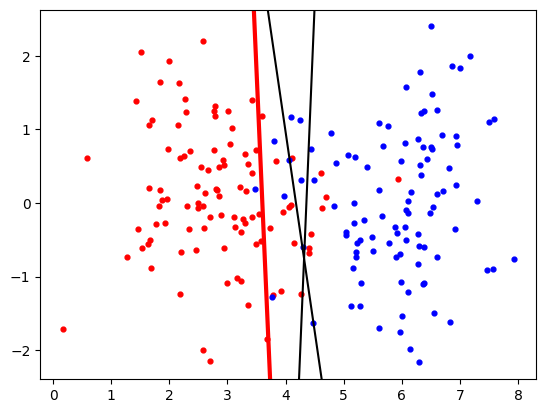

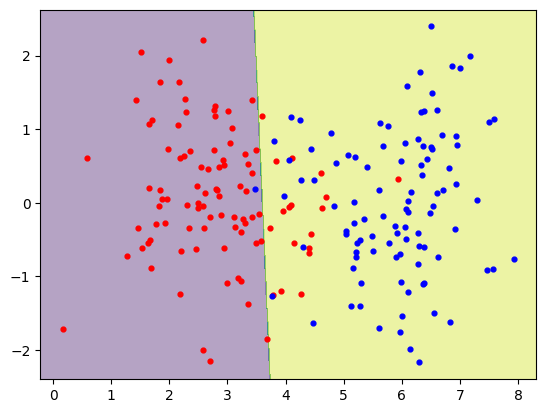

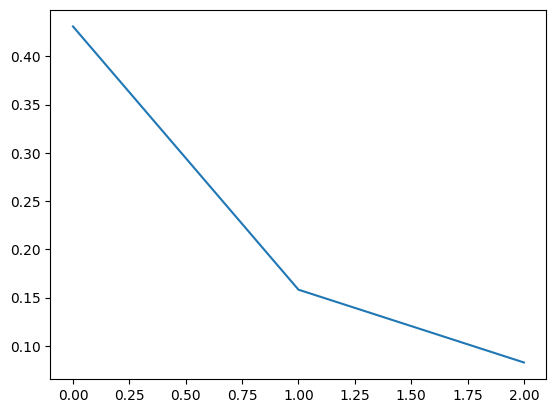

In [12]:
## Set up Perceptron for batch
clf = Perceptron(eta0=0.01, alpha=0.0, warm_start=True)

plt.figure(5)
plt.scatter(data1[:, 0], data1[:, 1], c='r', s=12)
plt.scatter(data2[:, 0], data2[:, 1], c='b', s=12)

tol = 0.1  # min value for change between consecutive weights

num_epoch = 0
max_epoch = 100  # Setting a max number of epochs
dwnorm_array = np.zeros((max_epoch, 1))  # Storing norm of weight change  at each iteration
previous_weight = np.zeros((1, 3)).ravel()  # This is nominal ... the weights are initially random.
while num_epoch < max_epoch:
    clf.fit(data, classes)  # Learning over one epoch
    dw = previous_weight - np.r_[clf.coef_[0], clf.intercept_]  # This is the change in weight
    dwnorm = np.sqrt(np.dot(dw, dw))

    # Plot the new decision boundary
    axes = plt.gca()
    (x_min, x_max) = axes.get_xlim()
    (y_min, y_max) = axes.get_ylim()  # We want to keep the plot to the same dimension
    plt.plot([x_min, x_max],
             [(-clf.coef_[0][0] * x_min - clf.intercept_) / clf.coef_[0][1],
              (-clf.coef_[0][0] * x_max - clf.intercept_) / clf.coef_[0][1]],
             'k-')
    plt.ylim([y_min, y_max])  # Restrict plot to original dimension
    plt.xlim([x_min, x_max])

    # pred_class = clf.predict(data)  # Prediction after learning -- actually not needed for this stopping criterion
    dwnorm_array[num_epoch] = dwnorm
    num_epoch += 1

    # Check termination criterion
    if dwnorm < tol:  # We have converged
        break
    previous_weight = np.r_[clf.coef_[0], clf.intercept_]


# Highlight last boundary
# Plot the new decision boundary
axes = plt.gca()
(x_min, x_max) = axes.get_xlim()
(y_min, y_max) = axes.get_ylim()  # We want to keep the plot to the same dimension
plt.plot([x_min, x_max],
         [(-clf.coef_[0][0] * x_min - clf.intercept_) / clf.coef_[0][1],
          (-clf.coef_[0][0] * x_max - clf.intercept_) / clf.coef_[0][1]],
         'r-', linewidth=3)
plt.ylim([y_min, y_max])  # Restrict plot to original dimension
plt.xlim([x_min, x_max])


# Print some statistics
print(f'Process terminated after {num_epoch} epochs')
print(f'Classification accuracy = {accuracy_score(classes, pred_class, normalize=False)}')
print(confusion_matrix(classes, pred_class))  # Confusion matrix

# Let's plot the weights
print(f'Final weights are: {clf.coef_[0][0]:.3f} {clf.coef_[0][1]:.3f} {clf.intercept_[0]:.3f}')

# Plotting decision regions
# First find out area of the graph
axes = plt.gca()
(x_min, x_max) = axes.get_xlim()
(y_min, y_max) = axes.get_ylim()
# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(6)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)  # Will reveal decision boundary
plt.scatter(data1[:, 0], data1[:, 1], c='r', s=12)
plt.scatter(data2[:, 0], data2[:, 1], c='b', s=12)


# Plot array of weight changes
plt.figure(7)
plt.plot(dwnorm_array[0:num_epoch])

# Done!